In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
death_state_year_cause = pd.read_csv('https://raw.githubusercontent.com/lanceeeaton/Leading_Causes_of_Death/master/Data/death_state_year_cause.csv')

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Checking for nulls

In [133]:
death_state_year_cause.isnull().values.any()

False

## Some stats on our data

In [134]:
death_state_year_cause.describe()

,Year,Deaths,Adj-Deaths
count,9180.00000,9180.000000,9180.000000
mean,2007.50000,3725.386928,60.751046
std,5.18841,7161.711981,67.906774
min,1999.00000,21.000000,2.600000
25%,2003.00000,526.000000,18.300000
50%,2007.50000,1401.500000,31.400000
75%,2012.00000,3228.250000,54.900000
max,2016.00000,71930.000000,347.400000


## Looking at observations with lowest death number

In [135]:
death_state_year_cause[death_state_year_cause['Deaths'] == 21.0]

,Year,Cause Name,State,Deaths,Adj-Deaths
9088,2002,Kidney disease,Alaska,21,6.8
9179,2012,Kidney disease,Vermont,21,2.6


## Looking at observations with highest death number

In [136]:
death_state_year_cause[death_state_year_cause['Deaths'] == 71930.0]

,Year,Cause Name,State,Deaths,Adj-Deaths
109,1999,Heart disease,California,71930,257.3


## Ranking the causes by least deaths to most

In [0]:
death_rank = death_state_year_cause.groupby(['Cause Name']).sum().sort_values(['Deaths'])

In [138]:
death_rank['Deaths']

Cause Name
Suicide                      649843
Kidney disease               807980
Influenza and pneumonia     1038969
Diabetes                    1316379
Alzheimer's disease         1373412
Unintentional injuries      2177884
CLRD                        2434726
Stroke                      2580140
Cancer                     10244536
Heart disease              11575183
Name: Deaths, dtype: int64

## Visualizing our ranking in a pie chart

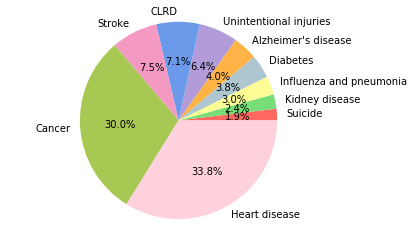

In [139]:
sizes = death_rank['Deaths'].values
labels = death_rank.index.tolist()
colors = ['#ff6961','#77dd77','#fdfd96','#aec6cf','#ffb347','#b19cd9','#6b9aea','#f49ac2','#A8C854','#ffd1dc']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%')
ax1.axis('equal')
plt.show()

## Checking distribution of each numerical feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2f887ee80>,
      dtype=object)

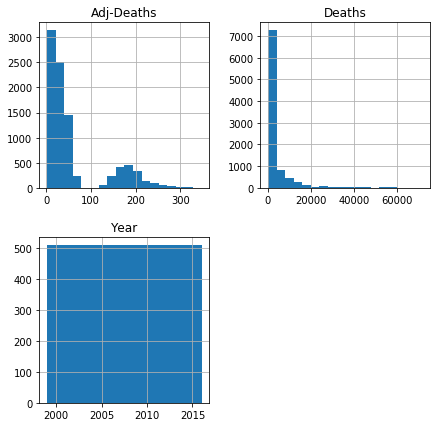

In [140]:
death_state_year_cause.hist(bins = 18, figsize = (7,7))

I believe this is skew is because causes like heart disease and cancer account for many more deaths then causes like suicide and kidney disease.  Only 20% of our observations are for heart disease and cancer but they account 63% of the total deaths. So, 80% of our data is split between 8 different causes so most observations contain a lower number for deaths.

## Checking the correlation between our numerical variables

In [141]:
death_state_year_cause.corr()

,Year,Deaths,Adj-Deaths
Year,1.000000,0.005517,-0.075103
Deaths,0.005517,1.000000,0.583347
Adj-Deaths,-0.075103,0.583347,1.000000


We can see that the only correlation of note is between Adj-Deaths and Deaths which is to be expected. That being said, it is only a moderate correlation meaning the other factors that go into calculating Adj-Deaths such as the age of the person play a fairly large role. 

## Let's see how each cause's death rate is changing over time
#### Here we are just populating a list with dataframes corresponding to each cause

In [143]:
def df_by_cause(cause):
  df = death_state_year_cause.loc[death_state_year_cause['Cause Name'] == cause]
  return df

causes = death_state_year_cause['Cause Name'].unique()
cause_totals = []
for cause in causes:
  cause_totals.append(df_by_cause(cause))
cause_totals[0].head()

,Year,Cause Name,State,Deaths,Adj-Deaths
0,1999,Heart disease,Mississippi,9336,347.4
1,2000,Heart disease,Mississippi,9256,341.2
2,2001,Heart disease,Mississippi,9050,333.5
3,2002,Heart disease,Mississippi,9061,332.6
4,1999,Heart disease,West Virginia,6822,325.5


## Visualizing our results (for easy viewing on Github)

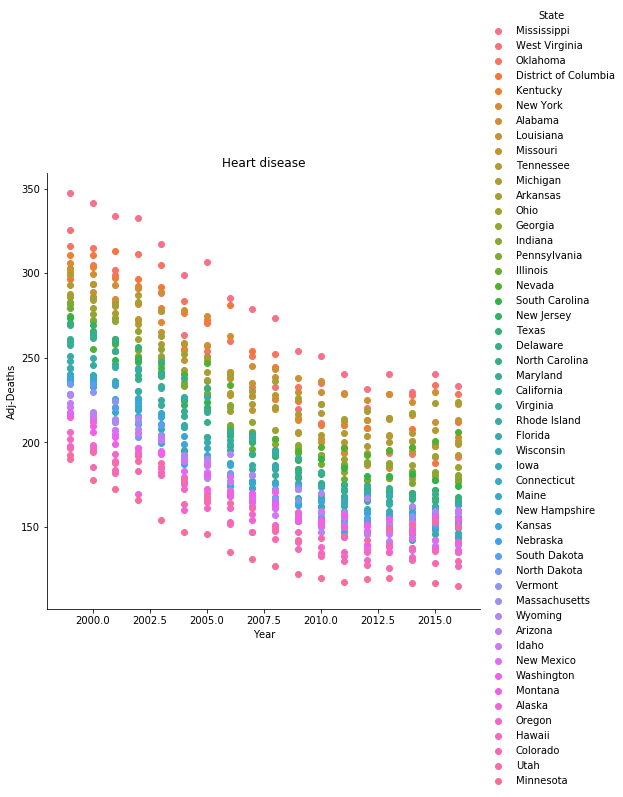

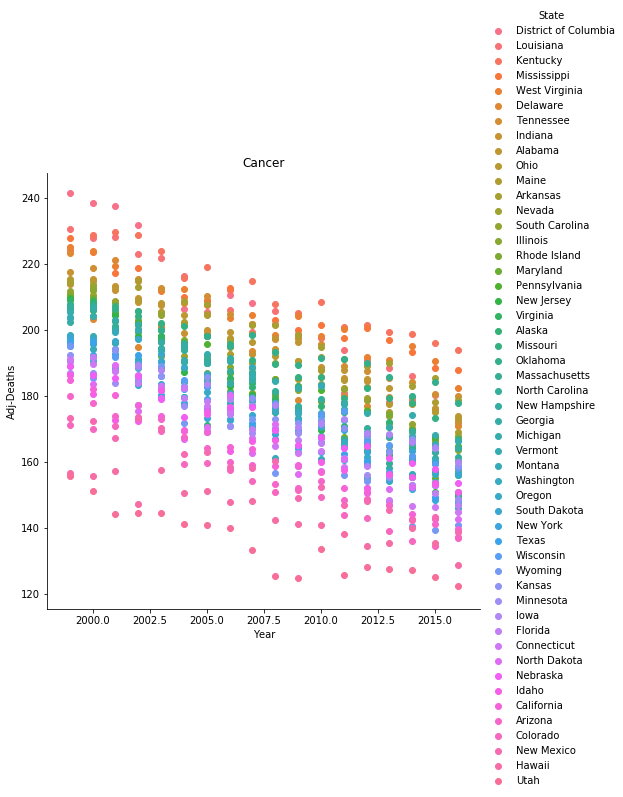

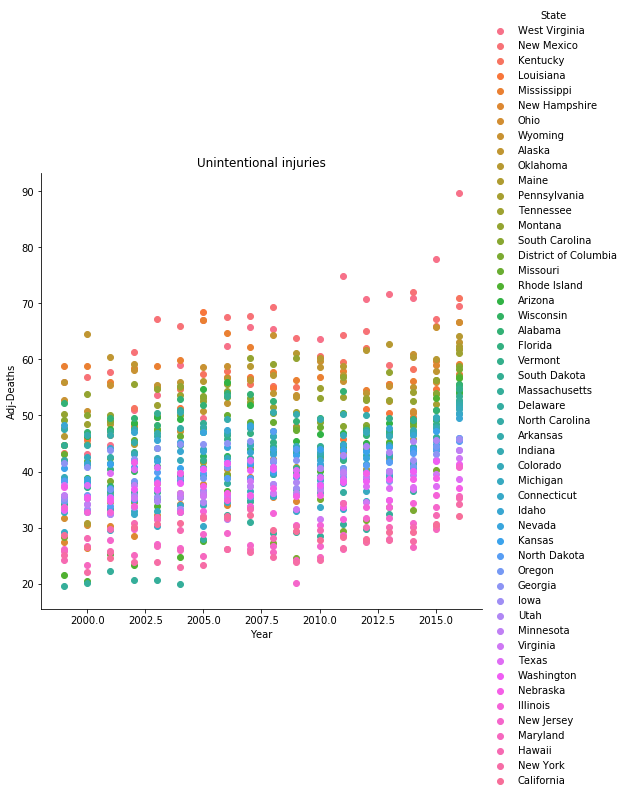

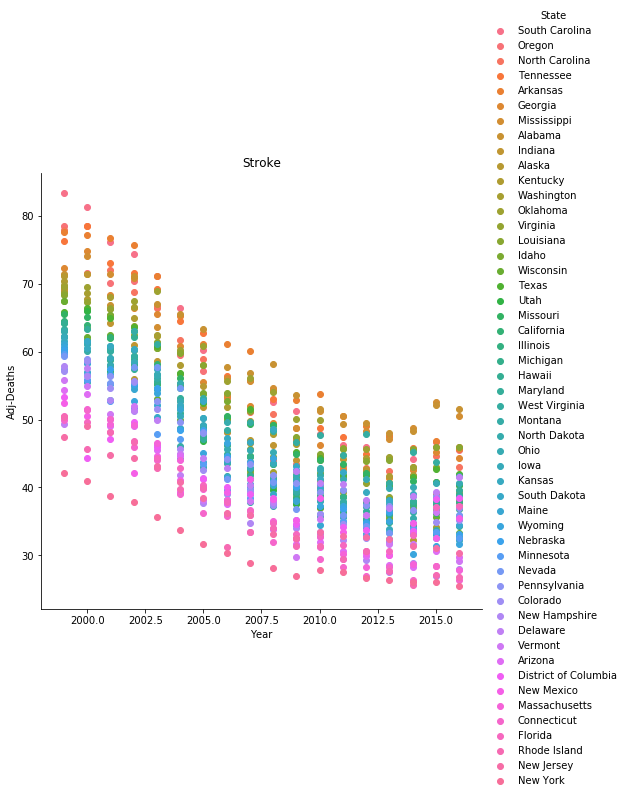

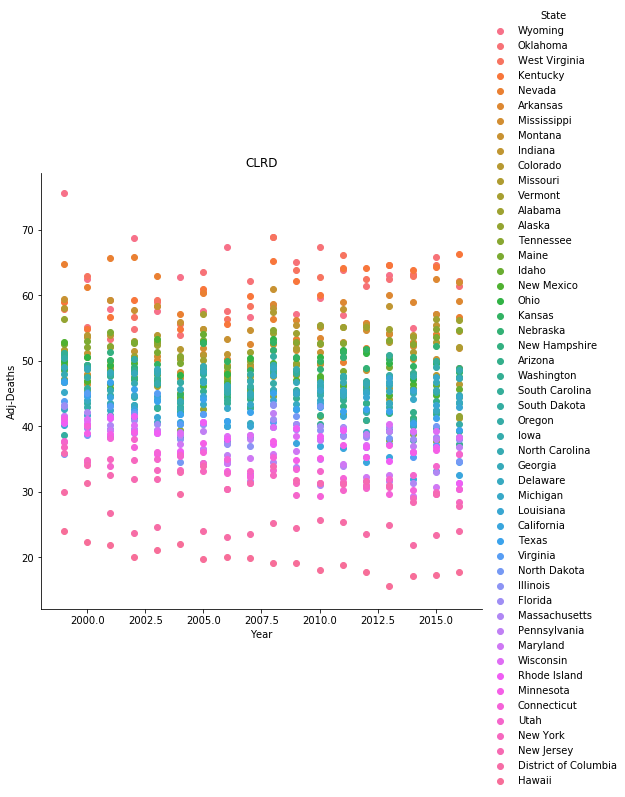

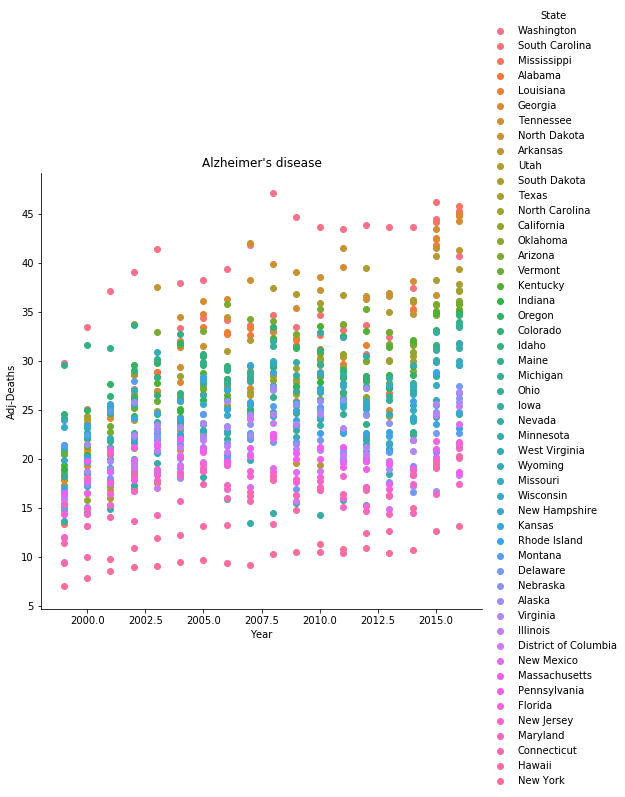

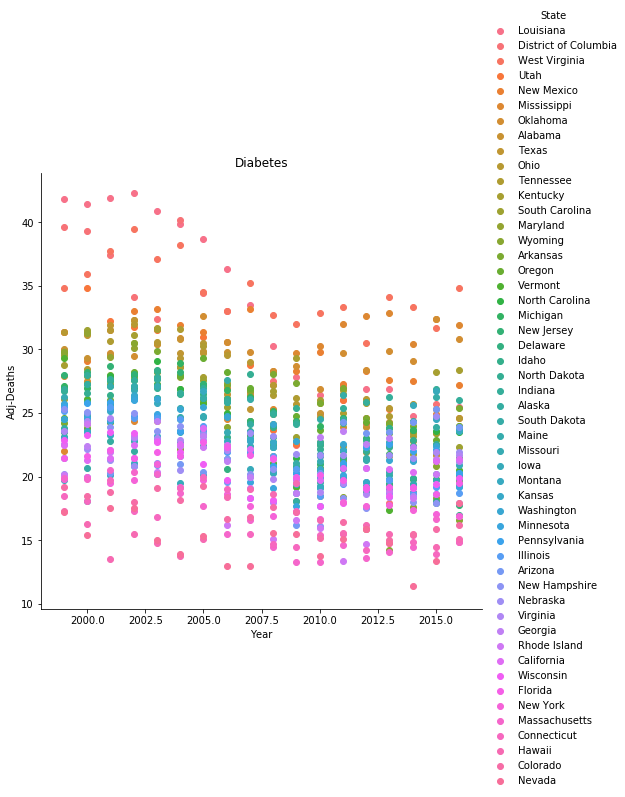

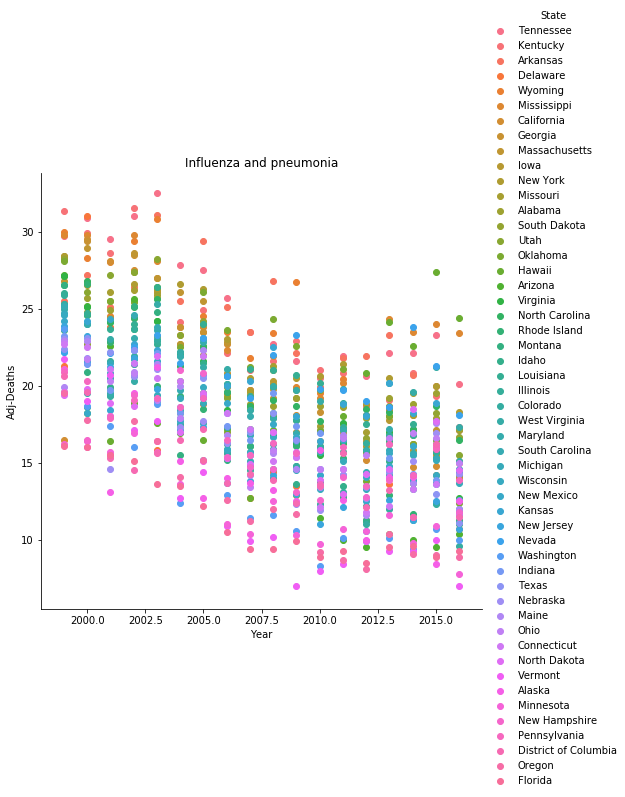

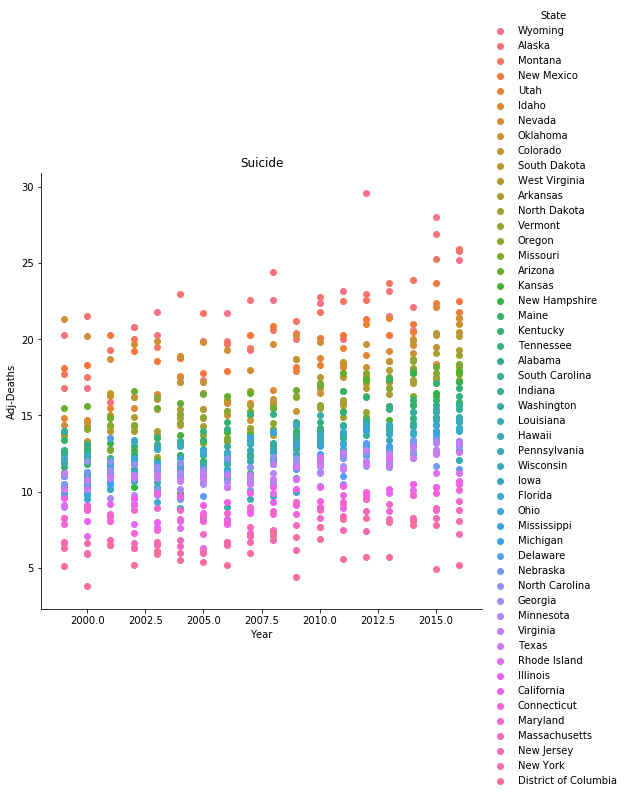

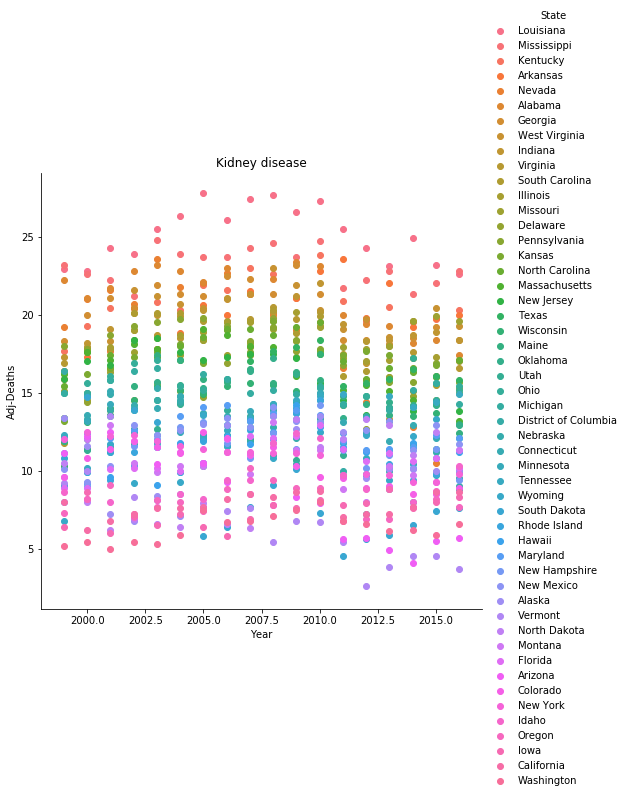

In [144]:
for i in range(len(cause_totals)):
  grid = sns.FacetGrid(cause_totals[i],hue='State',height = 7)
  plt.title(str(causes[i]))
  grid.map(plt.scatter,'Year','Adj-Deaths')
  grid.add_legend()

This gives you the idea but with so many states it's hard to see what's happening. Luckily we can use plotly to better visualize our results.

## Visualizing our results with plotly!
#### Play around with the plots there are lots of options

#### Follow this link to see the plots:
https://nbviewer.jupyter.org/github/lanceeeaton/Leading_Causes_of_Death/blob/master/Notebooks/death_state_year_cause_notebook.ipynb

In [145]:
configure_plotly_browser_state()
py.offline.init_notebook_mode(connected = True)

for i in range(len(cause_totals)):
  layout = go.Layout(
      title = str(causes[i]),
      yaxis = dict(
        title = 'Adj-Deaths'
      ),
      xaxis = dict(
        title = 'Year'
      ),
      hovermode = 'closest'
  )

  states = cause_totals[i]['State'].unique() # all states ordered
  cause_traces = []
  for state in states:
    cause_traces.append(
        go.Scatter(
        x = cause_totals[i].loc[cause_totals[i]['State'] == str(state)]['Year'],
        y = cause_totals[i].loc[cause_totals[i]['State'] == str(state)]['Adj-Deaths'],
        mode = 'markers',
        name = str(state)
      )
    )
  fig = go.Figure(data = cause_traces, layout=layout)
  py.offline.iplot(fig)

For overall state trends I'll have another notebook that visualizes total deaths for each state by year and looks to give some insights into that.